# Data Processing and EDA

<font color='red'> **PLEASE DO NOT RUN THIS NOTEBOOK!**</font>

<font color='red'>The files we worked with for the cleaning process were too large to push to Github, and therefore the filepaths in this notebook do not exist. However, we included this notebook to show our process for data cleaning and EDA.</font>

In [1]:
import gzip
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## load in raw data

The following code is how we read in the [raw data](https://amazon-reviews-2023.github.io/). The raw jsonl.gz file is too large to push to Github, and so we took only the subset of columns necessary for the training process, and transformed it into a csv file.

In [2]:
# DON'T RUN
# transform raw jsonl.gz file to a pandas dataframe

# df = pd.read_json('assets/All_Beauty.jsonl.gz', lines=True, compression='gzip')
# df = df[['user_id', 'parent_asin', 'timestamp']]
# df.to_csv('assets/beauty23_raw.csv', index = False)

In [3]:
df = pd.read_csv('assets/beauty23_raw.csv')
df

,user_id,parent_asin,timestamp
0,AGKHLEW2SOWHNMFQIJGBECAF7INQ,B00YQ6X8EO,2020-05-05 14:08:48.923
1,AGKHLEW2SOWHNMFQIJGBECAF7INQ,B081TJ8YS3,2020-05-04 18:10:55.070
2,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,B097R46CSY,2020-05-16 21:41:06.052
3,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,B09JS339BZ,2022-01-28 18:13:50.220
4,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,B08BZ63GMJ,2020-12-30 10:02:43.534
...,...,...,...
701523,AFIXGFVEGLMOTMBTJL7H3VSIETDQ,B006YUIWKA,2016-11-04 02:37:01.000
701524,AFV7YZFOJF564EZGET5LG45K4QEA,B006YUIWKA,2016-12-05 03:32:10.000
701525,AHYDCWDMMVMLBX7FY7M7JKADKRDQ,B06ZZV9MZT,2020-05-27 02:52:54.067
701526,AF6ZIAEN7TQ2WY5ZL77F6JDPV7XQ,B000HB6VLE,2007-07-18 22:36:49.000


## data cleaning and processing

In [4]:
# rename columns for simplicity

df.columns = ['usr', 'prod', 'timestamp']
df

,usr,prod,timestamp
0,AGKHLEW2SOWHNMFQIJGBECAF7INQ,B00YQ6X8EO,2020-05-05 14:08:48.923
1,AGKHLEW2SOWHNMFQIJGBECAF7INQ,B081TJ8YS3,2020-05-04 18:10:55.070
2,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,B097R46CSY,2020-05-16 21:41:06.052
3,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,B09JS339BZ,2022-01-28 18:13:50.220
4,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,B08BZ63GMJ,2020-12-30 10:02:43.534
...,...,...,...
701523,AFIXGFVEGLMOTMBTJL7H3VSIETDQ,B006YUIWKA,2016-11-04 02:37:01.000
701524,AFV7YZFOJF564EZGET5LG45K4QEA,B006YUIWKA,2016-12-05 03:32:10.000
701525,AHYDCWDMMVMLBX7FY7M7JKADKRDQ,B06ZZV9MZT,2020-05-27 02:52:54.067
701526,AF6ZIAEN7TQ2WY5ZL77F6JDPV7XQ,B000HB6VLE,2007-07-18 22:36:49.000


In [5]:
# follow filtering steps as outlined in paper:
# 1. keep only the products with 5 or more user interactions
# 2. then, keep only the users with 5 or more product interactions

min_user = 5
min_prod = 5

df = df.groupby('prod').filter(lambda x: x.shape[0] >= min_prod)
df = df.groupby('usr').filter(lambda x: x.shape[0] >= min_user)
df

,usr,prod,timestamp
8,AFSKPY37N3C43SOI5IEXEK5JSIYA,B08P2DZB4X,2021-07-27 13:04:04.559
9,AFSKPY37N3C43SOI5IEXEK5JSIYA,B086QY6T7N,2021-07-18 13:21:51.145
11,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07RBSLNFR,2021-05-16 17:00:30.697
12,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07SLFWZKN,2021-04-29 23:05:01.209
13,AFSKPY37N3C43SOI5IEXEK5JSIYA,B08JTNQFZY,2021-04-08 17:50:19.785
...,...,...,...
695780,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ,2020-12-23 15:03:12.373
695781,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ,2020-12-23 15:03:12.373
695783,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ,2020-12-23 15:03:12.373
695785,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ,2020-12-23 15:03:12.373


In [6]:
# change the `'timestamp'` column to unix time

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f').astype('int64') // 10**6
df

,usr,prod,timestamp
8,AFSKPY37N3C43SOI5IEXEK5JSIYA,B08P2DZB4X,1627391044559
9,AFSKPY37N3C43SOI5IEXEK5JSIYA,B086QY6T7N,1626614511145
11,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07RBSLNFR,1621184430697
12,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07SLFWZKN,1619737501209
13,AFSKPY37N3C43SOI5IEXEK5JSIYA,B08JTNQFZY,1617904219785
...,...,...,...
695780,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ,1608735792373
695781,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ,1608735792373
695783,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ,1608735792373
695785,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ,1608735792373


In [7]:
# for each user, order their products in ascending order by time

df = df.groupby('usr', sort=False).apply(
    lambda x: x.sort_values('timestamp')
).reset_index(drop=True)
df

/var/folders/2k/9mnd960x2j1d9b35wyjwwx200000gp/T/ipykernel_35618/3217903846.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('usr', sort=False).apply(


,usr,prod,timestamp
0,AFSKPY37N3C43SOI5IEXEK5JSIYA,B00JMDPK8S,1404402463000
1,AFSKPY37N3C43SOI5IEXEK5JSIYA,B01M7UMAUG,1508770624887
2,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07J3GH1W1,1547589356557
3,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07GDQPG12,1547589843451
4,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07W397QG4,1593352422858
...,...,...,...
9484,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ,1608735792373
9485,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ,1608735792373
9486,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ,1608735792373
9487,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ,1608735792373


In [8]:
# keep only the user and product columns

df = df[['usr', 'prod']]
df

,usr,prod
0,AFSKPY37N3C43SOI5IEXEK5JSIYA,B00JMDPK8S
1,AFSKPY37N3C43SOI5IEXEK5JSIYA,B01M7UMAUG
2,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07J3GH1W1
3,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07GDQPG12
4,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07W397QG4
...,...,...
9484,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ
9485,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ
9486,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ
9487,AEUGNUJOAKJNWDHART2SX6VBTJ6A,B07PX9J8YJ


In [10]:
# # save file as csv

# df.to_csv('assets/beauty23_clean.csv', index = False)

## EDA

In [3]:
beauty = pd.read_csv('assets/beauty23_clean.csv')

In [6]:
seq_lens = beauty['usr'].value_counts()
seq_lens.describe()

count    1007.000000
mean        9.423039
std         9.045818
min         5.000000
25%         5.000000
50%         6.000000
75%         9.000000
max       119.000000
Name: count, dtype: float64

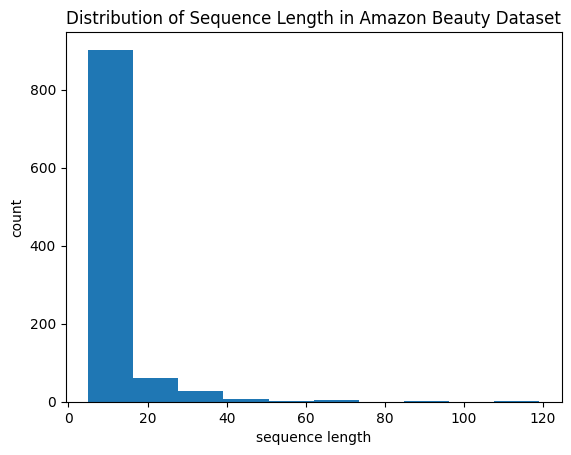

In [9]:
plt.hist(seq_lens)
plt.title('Distribution of Sequence Length in Amazon Beauty Dataset')
plt.xlabel('sequence length')
plt.ylabel('count')
plt.show()